# Figure 4

In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


# Structural connectivity

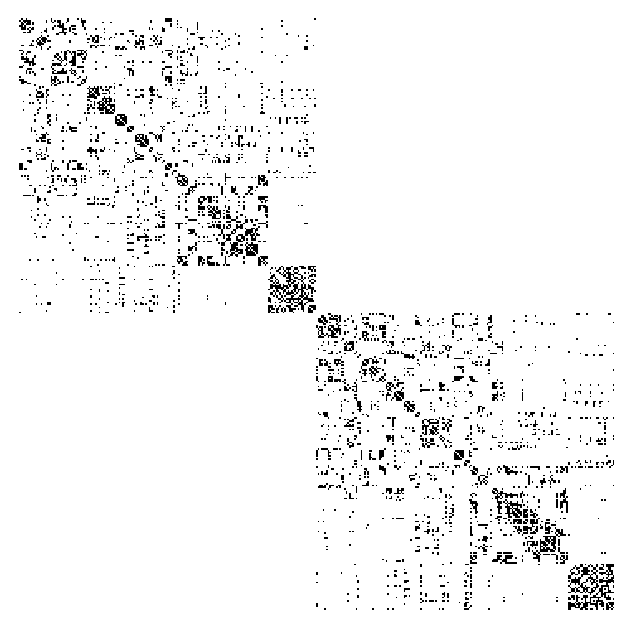

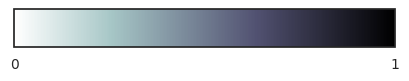

In [2]:
sc = matrices.ConnectivityMatrix('structural', exc_regions='adysgranular', exc_contra=True)
sc.plot_binarized()

## LTC in association with SC probability

Warning: The binarized associations are very computationally costly!

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-schaefer400_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Optimization terminated successfully.
         Current function value: 0.292860
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                 0.08194
Time:                        14:17:19   Log-Likelihood:                -9383.5
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------

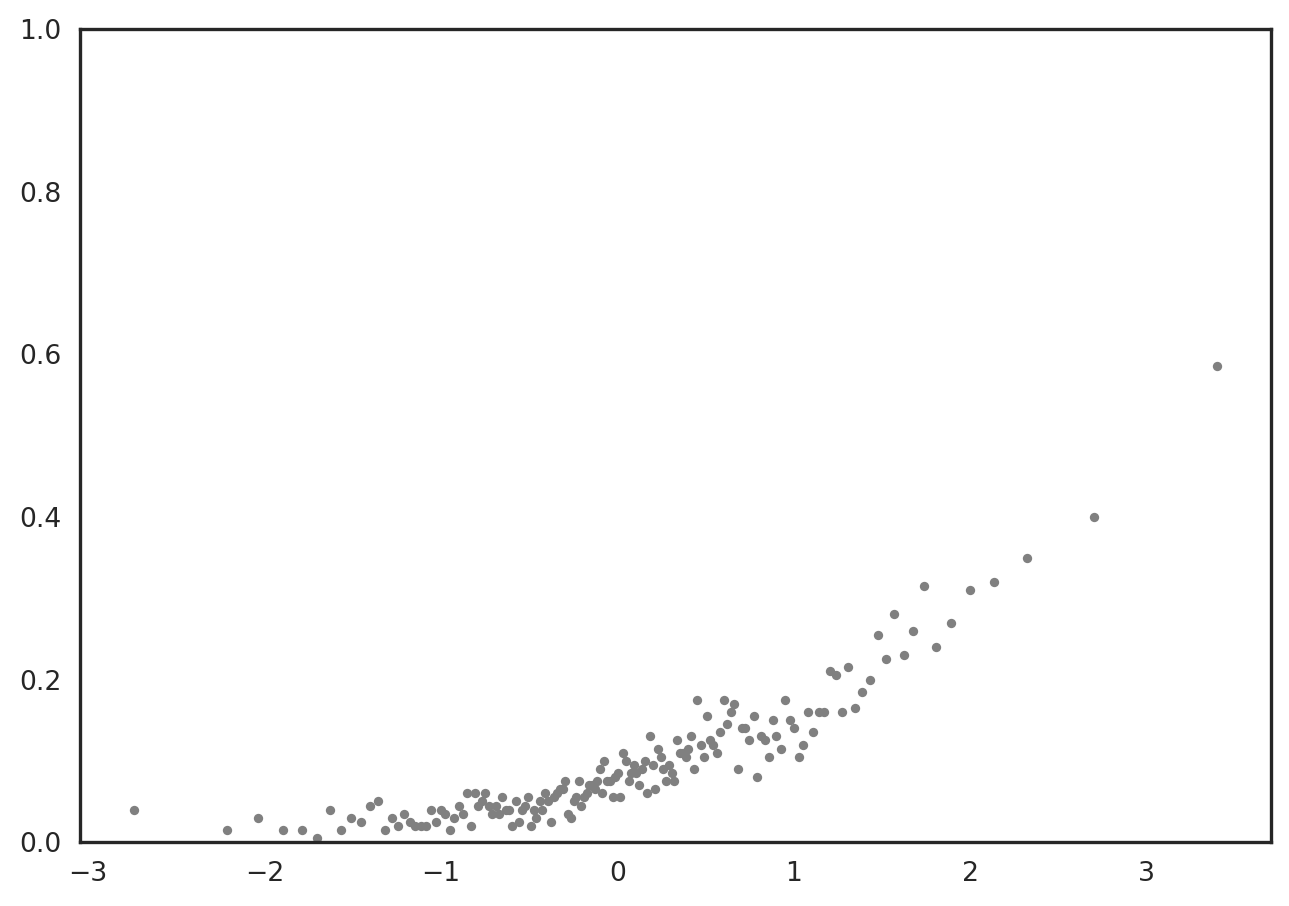

In [3]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'schaefer400')
models, pvals, null_models = sc.binarized_association(ltc, spin_test=True, n_perm=1000, stats_on_plot=False, labels_off=True)
print(pvals)

## Geodesic distance in association with SC probability

Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.191227
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                32041
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                  0.4005
Time:                        14:18:22   Log-Likelihood:                -6127.1
converged:                       True   LL-Null:                       -10221.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------

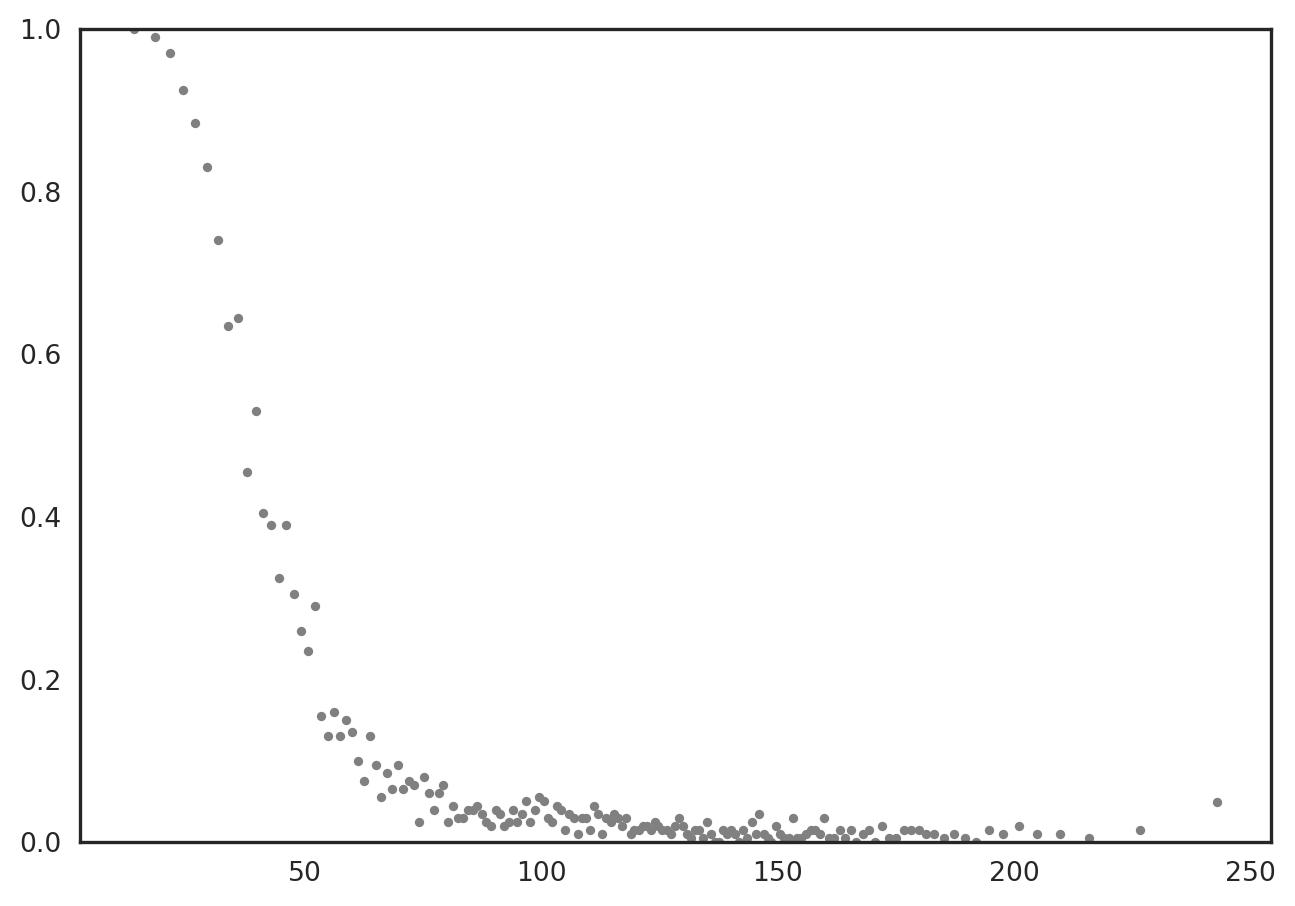

In [4]:
gd = matrices.DistanceMatrix('schaefer400')
models, pvals, null_models = sc.binarized_association(gd, spin_test=True, n_perm=1000, stats_on_plot=False, labels_off=True)
print(pvals)

## LTC in association with long-range SC probability

Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Optimization terminated successfully.
         Current function value: 0.100569
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Connected   No. Observations:                24597
Model:                          Logit   Df Residuals:                    24595
Method:                           MLE   Df Model:                            1
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                0.006203
Time:                        14:19:27   Log-Likelihood:                -2473.7
converged:                       True   LL-Null:                       -2489.1
Covariance Type:            nonrobust   LLR p-value:                 2.747e-08
                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------

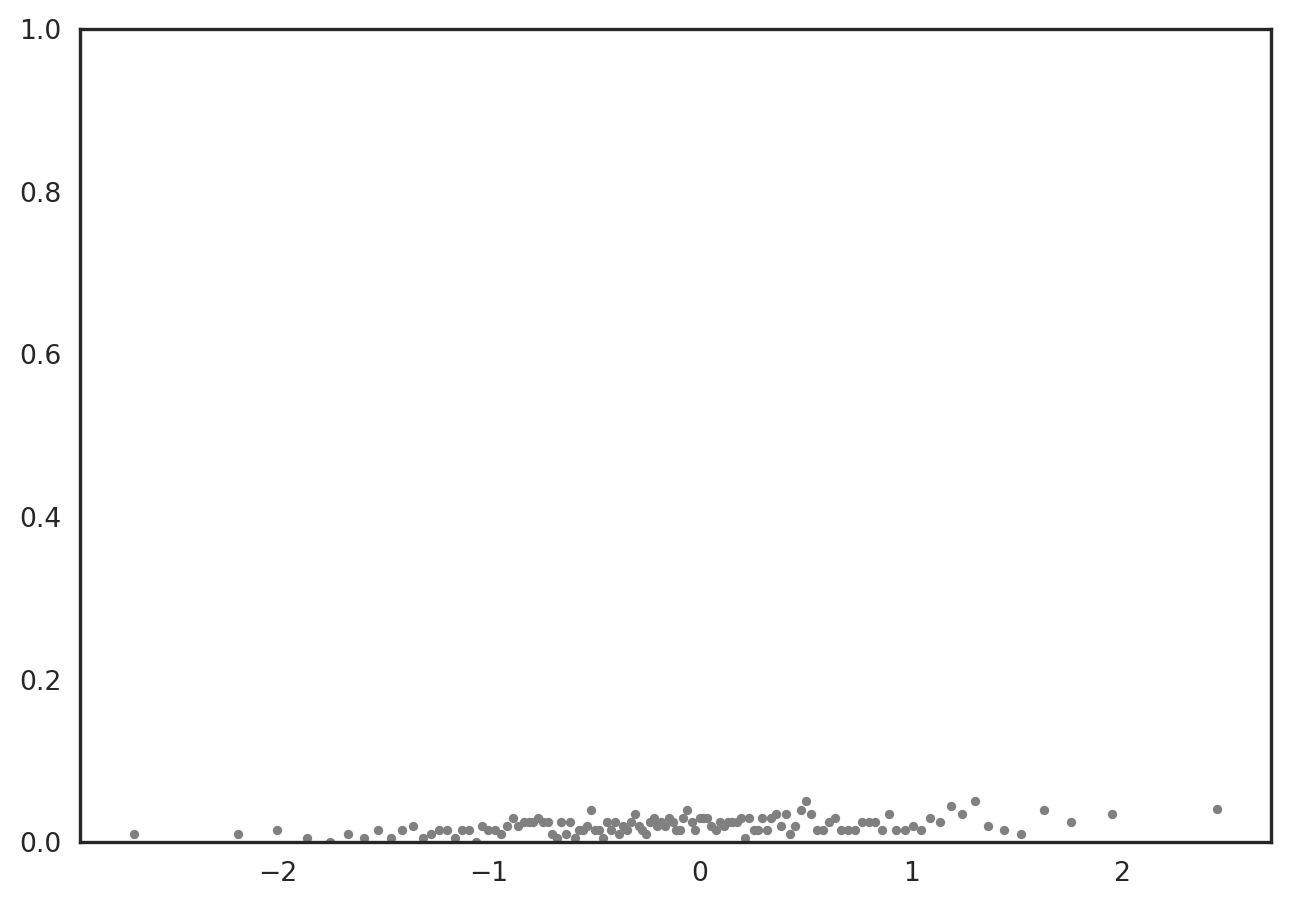

In [5]:
sc_long_range = matrices.ConnectivityMatrix('structural', exc_regions='adysgranular', exc_contra=True, long_range=True)
models, pvals, null_models = sc_long_range.binarized_association(ltc, spin_test=True, n_perm=1000, stats_on_plot=False, labels_off=True)
print(pvals)

# Functional connectivity

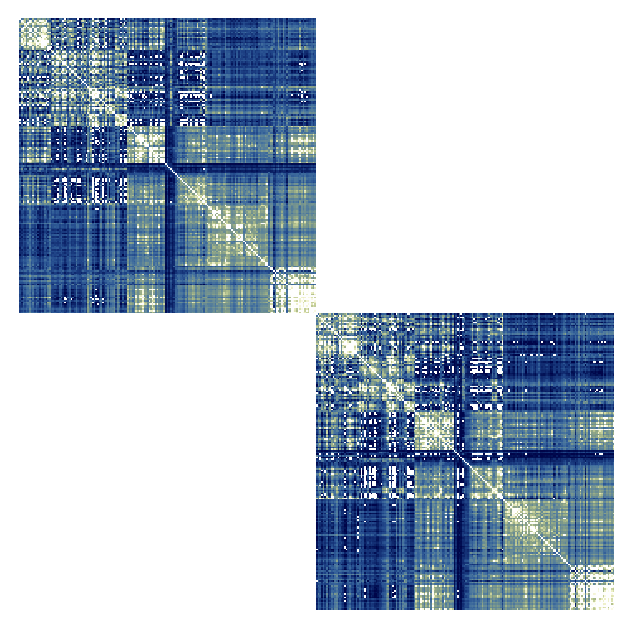

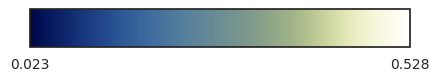

In [6]:
fc = matrices.ConnectivityMatrix('functional', exc_regions='adysgranular', exc_contra=True)
fc.plot()

## LTC in association with FC strength

Pearson correlation with Functional connectivity
Coef: 0.15767251244422165; p-value (spin): 0.0


(0.15767251244422165, 0.0)

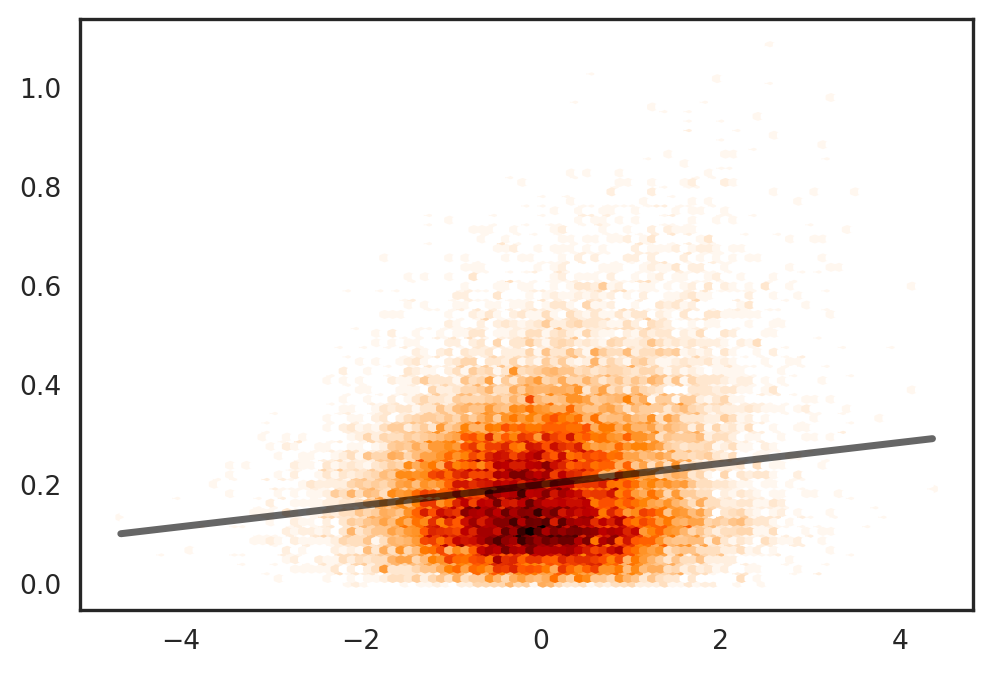

In [7]:
ltc.correlate_edge_wise(fc, n_perm=1000, axis_off=False, figsize=(6, 4), stats_on_plot=False, labels_off=True)

## Geodesic distance in association with FC strength

/home/asaberi/laminar_organization/code/figures/../helpers.py:1398: RuntimeWarning: overflow encountered in exp
  return a + b * np.exp(c * x)


R2 = 0.15025172986597435, p = 0.0


/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


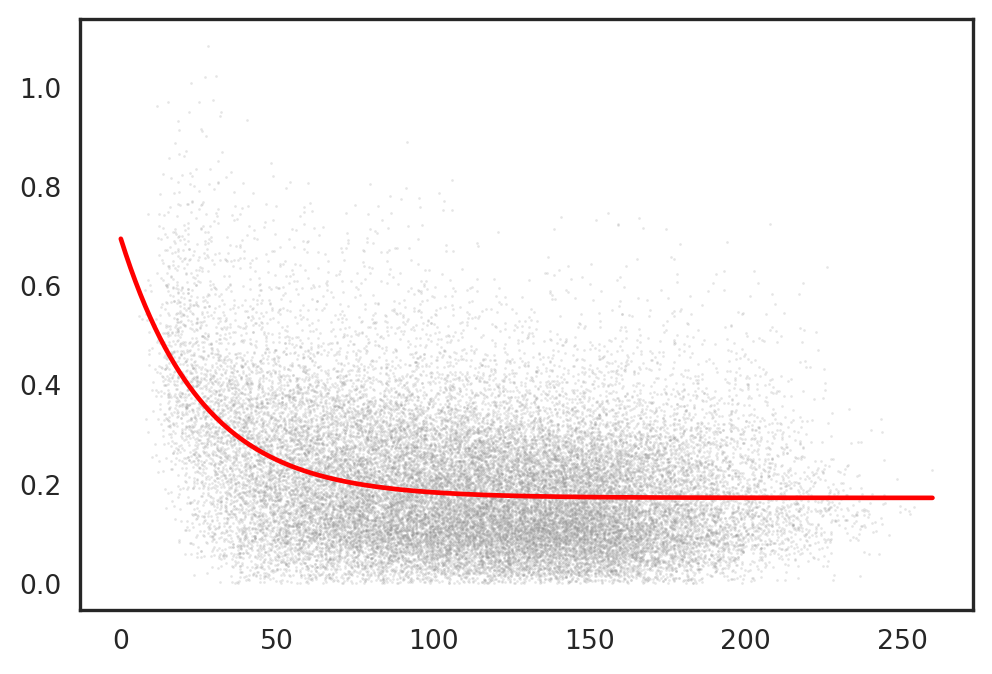

In [8]:
r2, p = gd.regress_out(fc, spin_test=True, return_r2=True, stats_on_plot=False, labels_off=True)
print(f'R2 = {r2}, p = {p}')

## LTC in association with long-range FC strength

Loading the matrix from /home/asaberi/laminar_organization/code/../output/distance/geodesic_distance_matrix_parc-schaefer400_approach-center-to-center.npz
Pearson correlation with Functional connectivity
Coef: 0.023239813874387116; p-value (spin): 0.331


(0.023239813874387116, 0.331)

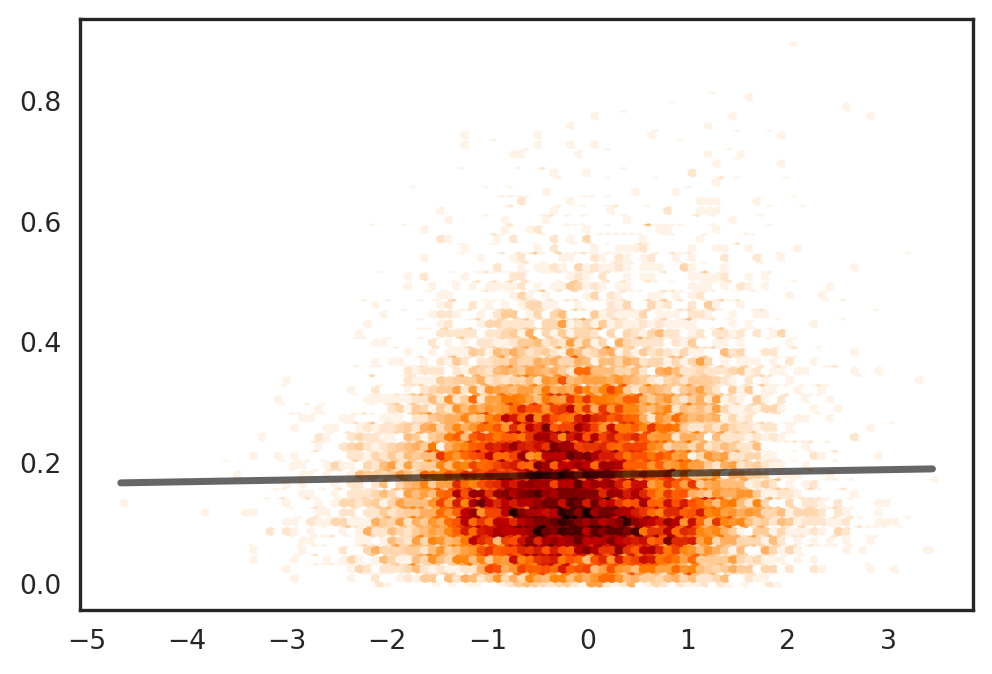

In [9]:
fc_long_range = matrices.ConnectivityMatrix('functional', exc_contra=True, long_range=True)

ltc.correlate_edge_wise(fc_long_range, n_perm=1000, axis_off=False, figsize=(6, 4), stats_on_plot=False, labels_off=True)